# Segmentation based on the gender and the total amount spent(K-means Clsutering).

## 1) Import Standard Libraries

In [69]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load the Dataset

In [70]:
#Read the processed data  csv and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data/processed", "sales_combined_data.csv")

retail_df = pd.read_csv(relative_path)
retail_df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Customer_ID.1,...,dummy_40_49,dummy_50_59,dummy_60_plus,gender_dummy,HolidayDummy,Max_Temp,Min_Temp,Mean_Temp,Total_Precip_mm,Product_Category.1
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,CUST001,...,0,0,0,1,1,1.6,-2.3,-0.3,0.0,Beauty
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,CUST002,...,0,0,0,0,0,0.8,-5.4,-2.3,7.2,Clothing
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,CUST003,...,0,1,0,1,0,-0.1,-8.8,-4.5,2.5,Electronics
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,CUST004,...,0,0,0,1,0,24.3,10.7,17.5,0.0,Clothing
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,CUST005,...,0,0,0,1,0,18.6,7.2,12.9,0.0,Beauty


## 3) Define the features

In [71]:
X = retail_df[["gender_dummy", "Total_Amount"]]
X

,gender_dummy,Total_Amount
0,1,150
1,0,1000
2,1,30
3,1,500
4,1,100
...,...,...
995,1,50
996,1,90
997,0,100
998,0,150


## 4) Standardization

In [72]:
# Scale the X variables using Standard Scaler

scaler = StandardScaler()
X[[ 'gender_dummy', 'Total_Amount']] = scaler.fit_transform(X[['gender_dummy', 'Total_Amount']])
X

C:\Users\srees\AppData\Local\Temp\ipykernel_15792\4231597987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[[ 'gender_dummy', 'Total_Amount']] = scaler.fit_transform(X[['gender_dummy', 'Total_Amount']])


,gender_dummy,Total_Amount
0,1.020204,-0.546704
1,-0.980196,0.971919
2,1.020204,-0.761098
3,1.020204,0.078611
4,1.020204,-0.636035
...,...,...
995,1.020204,-0.725366
996,1.020204,-0.653901
997,-0.980196,-0.636035
998,-0.980196,-0.546704


## 5) Data Visualization

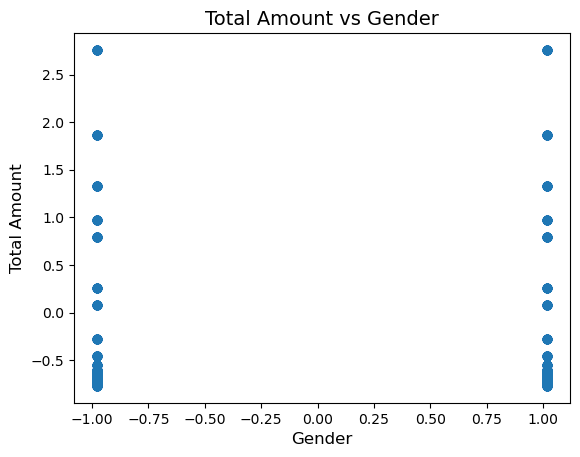

In [73]:
# Scatter plot for Total Amount vs Age
plt.scatter(X['gender_dummy'], X['Total_Amount'])

# Adding labels and title
plt.title('Total Amount vs Gender', fontsize=14)
plt.ylabel('Total Amount', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# Display the plot
plt.show()

## 6) K-means clustering

In [74]:

# Initialize the K-means model
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)

# Fit the model
clusters= kmeans.fit(X)


# Create a copy for clustering and modifictaions
clustered_retail_df = X.copy()

# Assign cluster labels to the original data as a new column
clustered_retail_df["Cluster"] = clusters.labels_
print(clustered_retail_df)

     gender_dummy  Total_Amount  Cluster
0        1.020204     -0.546704        0
1       -0.980196      0.971919        2
2        1.020204     -0.761098        0
3        1.020204      0.078611        0
4        1.020204     -0.636035        0
..            ...           ...      ...
995      1.020204     -0.725366        0
996      1.020204     -0.653901        0
997     -0.980196     -0.636035        1
998     -0.980196     -0.546704        1
999      1.020204     -0.600303        0

[1000 rows x 3 columns]


c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## 7) Visualize the clusters

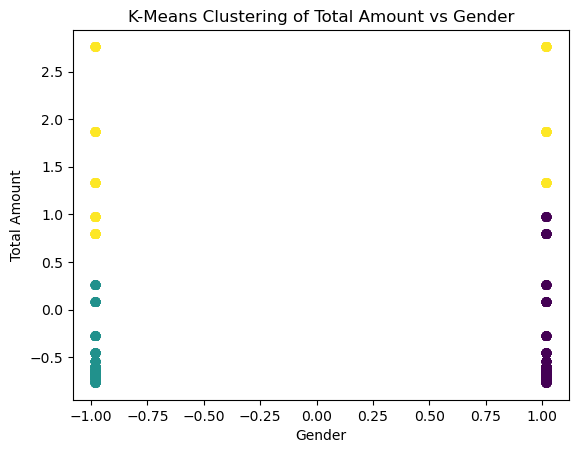

In [75]:
# Plot the clusters
plt.scatter(clustered_retail_df['gender_dummy'], clustered_retail_df['Total_Amount'], c=clustered_retail_df['Cluster'])
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('K-Means Clustering of Total Amount vs Gender')
plt.show()

There are also three distinct clusters based on gender:

1. A female group with relatively lower spending.
2. A male group with relatively lower spending.
3. A mixed-gender group with higher spending.

The high-spending group is smaller compared to the low-spending groups. Within the female group, there is a relatively higher proportion of medium to high spenders. These patterns closely align with the age-based clustering results, indicating that gender does not significantly improve the prediction of customer spending behavior.

## 8) Finding the optimal number of clusters(K) by elbow method

In [76]:
## Initialize an empty DataFrame to store the k and WSSD values
clustered_retail_df = pd.DataFrame(columns=["k", "wssd"])

# Loop through values of k from 1 to 10
for k in range(1, 11):
    # Initialize K-means clustering model
    elbow_kmeans = KMeans(n_clusters=k, random_state=0)
    # Fit the initialized model to our data
    elbow_kmeans.fit(X)

    # concat the current k and inertia (WSSD) to the dataframe
    new_row ={"k": k, "wssd": elbow_kmeans.inertia_}
    clustered_retail_df = pd.concat([clustered_retail_df, pd.DataFrame([new_row])], ignore_index=True)

# Convert k to float
clustered_retail_df["k"] = clustered_retail_df["k"].astype(float)

# Display the DataFrame
clustered_retail_df

c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\srees\AppData\Local\Temp\ipykernel_15792\552390.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustered_retail_df = pd.concat([clustered_retail_df, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can av

,k,wssd
0,1.0,2000.000000
1,2.0,1188.561706
2,3.0,457.385659
3,4.0,188.299706
4,5.0,139.506698
5,6.0,87.417116
6,7.0,64.763866
7,8.0,45.369714
8,9.0,31.812662
9,10.0,19.425570


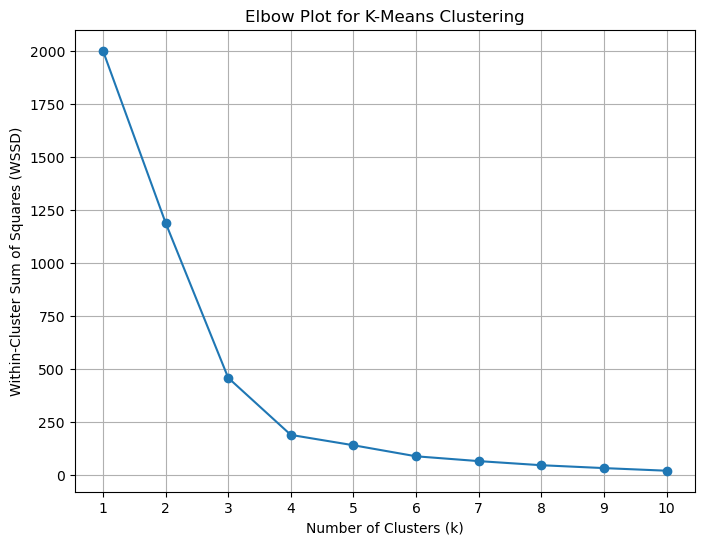

In [77]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(clustered_retail_df['k'], clustered_retail_df['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(clustered_retail_df['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

Three clusters appear to be the best choice here as well because the plot shows a clear "elbow" at this point. This means that adding more clusters beyond three doesn't significantly reduce the WSSD.

## 9) Conclusion

In conclusion, the clustering analysis based on gender mirrors the patterns observed in age-based segmentation. Both approaches highlight a smaller high-spending group and larger low-spending groups. This suggests that gender does not provide additional predictive value in understanding customer spending behavior.